# Introduction

This worksheet focuses on Neural Networks. You will:

- Implement your own version of a Single Layer Perceptron (SLP) to ensure you understand the details of how it works and compare it with the implementation available in `scikit-learn` to test and validate your solution.
- Use `scikit-learn`'s implementation of Multi-Layer Perceptrons (MLP) for both classification and regression tasks, exploring how to configure and optimise these models.

This is a reasonably long and difficult worksheet, but, hopefully, an interesting one. Try your best at it and don't worry if you don't get it all done. We will be posting the solutions and you can always ask about it in a different lab in future weeks.

**Note**: This is a challenging worksheet, and you might not finish all tasks during the lab. However, it is designed to be engaging, so do as much as you can. Remember that the solutions will be made available.

# 0. Preliminaries
We firstly import NumPy and matplotlib as we will be using these throughout the worksheet. We use a function %matplotlib inline to display plots in the worksheet.

In [1]:
#TODO: import NumPy and matplotlib here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Single Layer Perceptron  
In this question, we will use a single layer perceptron from `sklearn` to make predictions on the **breast cancer dataset**. This is a classification problem where the aim is to classify instances as either malignant or benign based on 30 features, each representing various characteristics present in the images.

In this question, you will:  
(a) Download the dataset from `sklearn` and store the data and targets in suitable variables.  
(b) Separate your data into a training and test split.  
(c) (Optional) Write your own function to implement Single Layer Perceptron.   
(d) Train a neural network classifier on the training data using the implementation from `sklearn` (`Perceptron`).  
(e) Evaluate the performance of both models on the test data using appropriate metrics (e.g., accuracy, precision).  
(f) Plot the confusion matrix to visualise the performance of your model.

## Part (a)  
Import the package `datasets` from `sklearn` and then load the load_breast_cancer dataset (function is `load_breast_cancer()`). Save the data into a variable `X` and the targets into a variable `Y`.  
Take a look at the data in `X`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`).  
Take a look at the targets. Is this suitable for a classification algorithm or a regression algorithm?  

In [2]:
#TODO: import suitable packages, load the dataset, and save data and targets into variables X and Y
from sklearn import datasets
cancer_data = datasets.load_breast_cancer()
X = cancer_data.data
Y = cancer_data.target

In [3]:
print(X.shape, Y.shape)

(569, 30) (569,)


In [4]:
Y[200:300]
# Y

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

## Part (b)

Use the function `train_test_split` from `sklearn.model_selection` to split your data into a training set and a held-out test set. Use a test set that is 0.2 of the original dataset. Set the parameter `random_state` to 10 to help with replication.

In [5]:
# TODO: import the package train_test_split from sklearn.model_selection.
from sklearn.model_selection import train_test_split

# Split the dataset into Xtr, Xtest, Ytr, Ytest
Xtr, Xtest, Ytr, Ytest = train_test_split(X, Y, test_size=0.2, random_state=10)

## (Optional) Part (c)  
Recall from the lecture that a single-layer perceptron runs as follows:  

**Training step**:  
- For each training datapoint $(\vec{x}_i)$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x}_i + b)$.  
  - Pass \(z\) through the activation function (step function in this case) to get the predicted class $(y_{\text{pred}})$.  
  - Compute the error as $(e = y_i - y_{\text{pred}})$, where $(y_i)$ is the true label.  
  - Update the weights and bias using the perceptron learning rule:  
    $[
    \vec{w} \gets \vec{w} + \eta \cdot e \cdot \vec{x}_i  
    ]  
    [
    b \gets b + \eta \cdot e
    ]$  
  Here, $(\eta)$ is the learning rate.  

**Prediction step**:  
- For a given datapoint $(\vec{x})$:  
  - Compute the linear combination $(z = \vec{w} \cdot \vec{x} + b)$.  
  - Pass $(z)$ through the step function to obtain the class prediction.  

Write function(s) to implement the training and prediction steps. Y

In [6]:
# class SingleLayerPerceptron:
#     def __init__(self, input_size, learning_rate, iterat):
#         #TODO# initialise the weights to random values and set the bias to 0
#         self.weights = ##TODO## (HINT: use np.random.rand())
#         self.bias = ##TODO## 
#         self.learning_rate = learning_rate
#         self.iterat = iterat

#     def activation(self, z):
#         #TODO # Write a function to implement the **step activation function**. This activation function should output return 1 if z >= 0, else 0
#         return ##TODO## 
   
#     def train(self, X, y):
#         for epoch in range(self.iterat):
#             for i in range(X.shape[0]):
#                 # Calculate the linear combination
#                 z = np.dot(X[i], self.weights) + self.bias
#                 y_pred = self.activation(z)

#                 #TODO# Calculate error between target and predicted values
#                 error = ##TODO## 
                
#                 #TODO# update the weights and bias according to the above equations
#                 self.weights += ##TODO##
#                 self.bias += ##TODO##

#     def predict(self, X):
#         z = np.dot(X, self.weights) + self.bias
#         return self.activation(z)
# #Train the perceptron
# input_size = Xtr.shape[1] # To pass the number of features
# perceptron1 = SingleLayerPerceptron(input_size=input_size, learning_rate=0.01, iterat=10)

# ##TODO##  #Train the perceptron with the Train data
# perceptron1.train(Xtr, Ytr)

# #Test the perceptron
# my_Ypred = ##TODO##


## Perceptron in scikit-learn

The `Perceptron` class in `scikit-learn` provides an implementation of the single-layer perceptron algorithm, modified to handle both binary and multi-class classification tasks. 
- **Activation Function**: Applies a step activation function, outputting class labels based on the linear combination of inputs and weights.  


## Part (d)  
Now we can compare your implementation with the `sklearn` implementation. Firstly, import the classifier `Perceptron` from `sklearn.linear_model`. Specify relevant hyperparameters such as the learning rate and maximum iterations (same as in the model above). Fit the model on the training data and make predictions on the test set.  

In [7]:
# import the classifier Perceptron from sklearn.linear_model.
from sklearn.linear_model import Perceptron

# Instantiate the Perceptron classifier with learning rate (eta) and max_iterations same as above. 
perceptron2 = Perceptron(
    max_iter=50,    # Maximum number of iterations 
    eta0=0.01,        # Learning rate
    verbose=1  
)

# Train the Perceptron on the training data
perceptron2.fit(Xtr, Ytr)

# Test the Perceptron
Y_pred = perceptron2.predict(Xtest)

-- Epoch 1
Norm: 69.83, NNZs: 30, Bias: 0.650000, T: 455, Avg. loss: 2147.735201
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 91.32, NNZs: 30, Bias: 0.950000, T: 910, Avg. loss: 1044.748755
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 113.14, NNZs: 30, Bias: 1.240000, T: 1365, Avg. loss: 1029.165170
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 129.12, NNZs: 30, Bias: 1.480000, T: 1820, Avg. loss: 881.445050
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 140.26, NNZs: 30, Bias: 1.670000, T: 2275, Avg. loss: 845.986504
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 156.09, NNZs: 30, Bias: 1.920000, T: 2730, Avg. loss: 960.726033
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 162.39, NNZs: 30, Bias: 2.010000, T: 3185, Avg. loss: 594.757617
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 175.03, NNZs: 30, Bias: 2.210000, T: 3640, Avg. loss: 827.942302
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 182.39, NNZs: 30, Bias: 2.330000, T: 4095, Avg. 

## Part (e) (Optional) 
Use the built in metrics in sklearn to calculate the accuracy of your classifier on the Testing set. Compare the accuracy of the `sklearn` implementation with your custom implementation. 

In [8]:
from sklearn.metrics import accuracy_score

##TODO## Write your answer here
#Evaluate the accuracy

## Part(f) 
Plot the confusion matrix to visualise the performance of your model.

0.8421052631578947
[[37  2]
 [16 59]]
              precision    recall  f1-score   support

           0       0.70      0.95      0.80        39
           1       0.97      0.79      0.87        75

    accuracy                           0.84       114
   macro avg       0.83      0.87      0.84       114
weighted avg       0.88      0.84      0.85       114



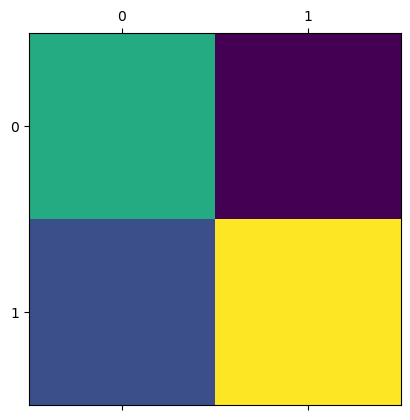

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
##TODO## Write your answer here
accuracy_result = accuracy_score(Ytest, Y_pred)
print(accuracy_result)
cm = confusion_matrix(Ytest, Y_pred)
plt.matshow(cm)
print(cm)

report = classification_report(Ytest, Y_pred)
print(report)

If the accuracy is low, consider increasing the maximum number of iterations and repeating the fitting and testing process.

# 2. Multilayer Perceptron
 <img src="attachment:82da26eb-a283-4bb4-a5a3-264c06e568b5.png" width="400"/>

The input layer, located on the far left, contains neurons that correspond to the input features. Each neuron in the hidden layer processes the values from the previous layer through a weighted sum, which is then passed through a non-linear activation function, such as `ReLU`. Finally, the output layer takes the values from the last hidden layer and converts them into the model’s output.

## Pre-Written Functions in scikit-learn for MLP Classification and Regression

`scikit-learn` provides pre-written implementations for neural network models through the `MLPClassifier` and `MLPRegressor` classes.
- The `MLPClassifier` and `MLPRegressor` automatically select the appropriate configurations (e.g., loss functions and output functions) based on the problem type.
- Users can modify hyperparameters (e.g., `hidden_layer_sizes`, `activation`, `max_iter`, etc) to tune the model for specific tasks.
- **Note**: In other machine learning libraries, you may need to manually set the loss function and output function, as they are not always configured automatically.

# 2.1. Multi-class Classification using Multilayer Perceptron

Now that we’ve compared how your Perceptron model performs against the `sklearn` Perceptron for binary classification, we’ll explore a multiclass classification problem using the `load_digits` dataset. This dataset involves classifying 8x8 images of handwritten digits (0–9) based on 64 pixel intensity features.

In this task, you will:  
(a) Load the dataset from `sklearn` and store the data and targets.  
(b) Split the data into training and test sets.  
(c) Train a neural network classifier using `MLPClassifier`.  
(d) Evaluate your model’s performance on the test set (e.g., accuracy, precision).  
(e) Modify your hyperparameters.  
(f) (Optional) Plot the loss curve.

## Part (a)  
From `sklearn.datasets` load the load_digits dataset (function is `load_digits()`). Save the data into a variable `X1` and the targets into a variable `Y1`.  
Take a look at the data in `X1`. How many datapoints are there? How many features does each datapoint have? (Hint: use `np.shape`). 
Take a look at the targets. How many classes does the output need to be classified into??  

In [10]:
#TODO#  #Load the dataset
digits = datasets.load_digits()
X1 = digits.data
Y1 = digits.target
print(X1.shape, Y1.shape)
set(Y1)

(1797, 64) (1797,)


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Look at the images corresponding to the input. Set the value of the target as the output.

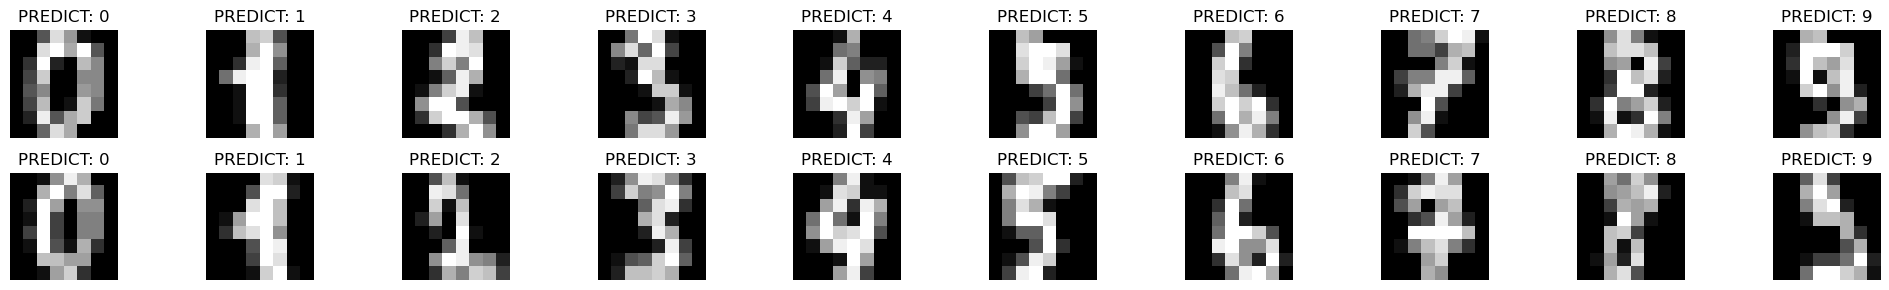

In [11]:
fig, axes = plt.subplots(2, 10, figsize=(20, 3))  # 调整图像大小

for i in range(20):
    axes[i//10, i %10].imshow(digits.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"PREDICT: {digits.target[i]}")
    
plt.tight_layout()
plt.show()

## Part (b)  
Split the dataset into training and testing sets

In [12]:
##TODO##
Xtr1, Xtest1, Ytr1, Ytest1 = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

##  MLPClassifier from `sklearn.neural_network`
- Designed for classification tasks 
- Uses `log-loss` (also called cross-entropy loss function) by default.
- outputs probabilities for each class by default using the **softmax** activation function.

## Part (c)
Import `MLPClassifier` from `sklearn.neural_network`.After importing, check the default parameters of the `MLPClassifier` model.

Create an instance of the `MLPClassifier` with the following settings:
- 2 hidden layers, each with 10 neurons.
- activation set as ReLU  
- Set the maximum number of iterations (`max_iter`) to 10.
- 
Train the model using the training data (`Xtr1`,`Ytr1`)

In [13]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(
    hidden_layer_sizes = (10,10),  
    activation = "relu",   
    learning_rate_init = 0.01,
    max_iter = 10, 
    verbose = 2
)


##TODO## Train the MLPClassifier on the training data
##TODO##
mlp_classifier.fit(Xtr1, Ytr1)

Iteration 1, loss = 6.07788722
Iteration 2, loss = 2.33709431
Iteration 3, loss = 2.28793123
Iteration 4, loss = 2.22337095
Iteration 5, loss = 2.16297116
Iteration 6, loss = 2.10836347
Iteration 7, loss = 2.07430873
Iteration 8, loss = 2.05220980
Iteration 9, loss = 2.03541978
Iteration 10, loss = 2.02039023


/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=10,
              verbose=2)

## Part (d)
Make predictions on the test set.
Measure accuracy using sklearn_metrics

In [14]:
##TODO##
y_pred_mlp1 = mlp_classifier.predict(Xtest1)
accuracy_mlp1 = accuracy_score(Ytest1, y_pred_mlp1)
print(accuracy_mlp1)

0.23055555555555557


Visualize a sample of images and their predictions for MLP. Check if it is correct.

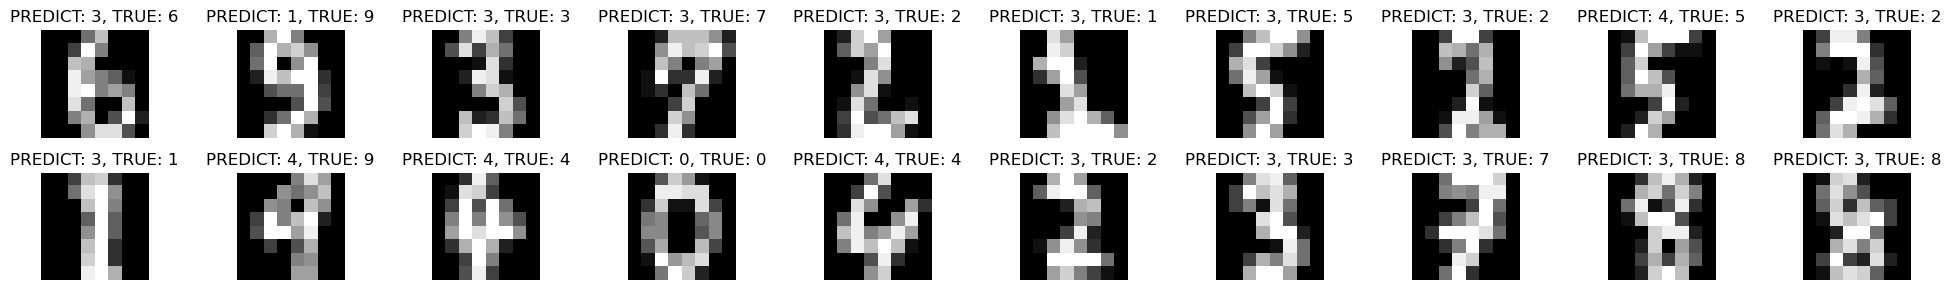

In [15]:
fig, axes = plt.subplots(2, 10, figsize=(20, 3))  # 调整图像大小
for i in range(20):
    ax = axes[i // 10, i % 10]  # 正确地索引subplot
    ax.imshow(Xtest1[i].reshape(8, 8), cmap='gray')  # 假设每个图像是 8x8 像素
    ax.axis('off')
    ax.set_title(f"PREDICT: {y_pred_mlp1[i]}, TRUE: {Ytest1[i]}")  # 使用预测结果作为标题

plt.tight_layout()
plt.show()

## Part (e)
Experiment with Hidden Layer Configurations
This neural network currently has 2 hidden layers, each with 10 neurons (`hidden_layer_sizes=(10,10)`). The parameter `hidden_layer_sizes=(x, y, ...)` specifies the number of neurons in each layer.

- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?

Investigate the Parameter `activation`
Explore the parameter `activation` in the `MLPClassifier` model. 

- What are the different activation functions available (e.g., `relu`, `tanh`, `logistic`)?
- Change the activation function and observe how it impacts the model's performance.

Investigate the Parameter `learning_rate_init`
- Explore the parameter `activation` in the `MLPRegressor` or `MLPClassifier` model. 
- What does increasing or decreasing the value of learning_rate result in?

In [16]:
# 改参数
# mlp_classifier = MLPClassifier(
#     hidden_layer_sizes = (10,10),  
#     activation = "relu",   
#     learning_rate_init = 0.01,
#     max_iter = 10, 
#     verbose = 2
# )

# mlp_classifier.fit(Xtr1, Ytr1)

# y_pred_mlp1 = mlp_classifier.predict(Xtest1)
# accuracy_mlp1 = accuracy_score(Ytest1, y_pred_mlp1)
# print(accuracy_mlp1)

# fig, axes = plt.subplots(2, 10, figsize=(20, 3))  # 调整图像大小
# for i in range(20):
#     ax = axes[i // 10, i % 10]  # 正确地索引subplot
#     ax.imshow(Xtest1[i].reshape(8, 8), cmap='gray')  # 假设每个图像是 8x8 像素
#     ax.axis('off')
#     ax.set_title(f"PREDICT: {y_pred_mlp1[i]}, TRUE: {Ytest1[i]}")  # 使用预测结果作为标题

# plt.tight_layout()
# plt.show()

## Part (f) (Optional)
Plot the loss curve (progression of the loss during training)
Access the model's loss curve to visualise the progression of the loss during training.
- Use the `loss_curve_` attribute of the trained model to retrieve the loss values for each iteration.

In [17]:
##TODO##

# 2.2.  Regression using Multilayer Perceptron
Now, we’ll perform a regression task using a Multilayer Perceptron on the `load_diabetes` dataset. This dataset involves predicting a continuous target variable related to diabetes progression based on 10 numerical features.  

In this task, you will:  
(a) Load the dataset using the `load_diabetes` function from `sklearn.datasets`.  
(b) Split the data into training and test sets.  
(c) Train a neural network regressor using `MLPRegressor`.  
(d) Evaluate your model’s performance on the test set using metrics such as mean squared error (MSE) and R² score.  
(e) Experiment with different hyperparameters to optimise the model's performance.  
(f) (Optional) Plot the predicted vs actual values to visualise the model's accuracy.  
(g) Plot the loss curve

## Part (a)
Load the load_diabetes from sklearn.datasets
Check the X and y of your data
Take a look at the data in `X2` and the target labels in `Y2`. Find their shapes using `.shape`. 
- How many data points are there in `X2`?
- How many features does each data point have?
- Does the data require scaling or normalising before training a neural network model?

(569, 30) (569,)


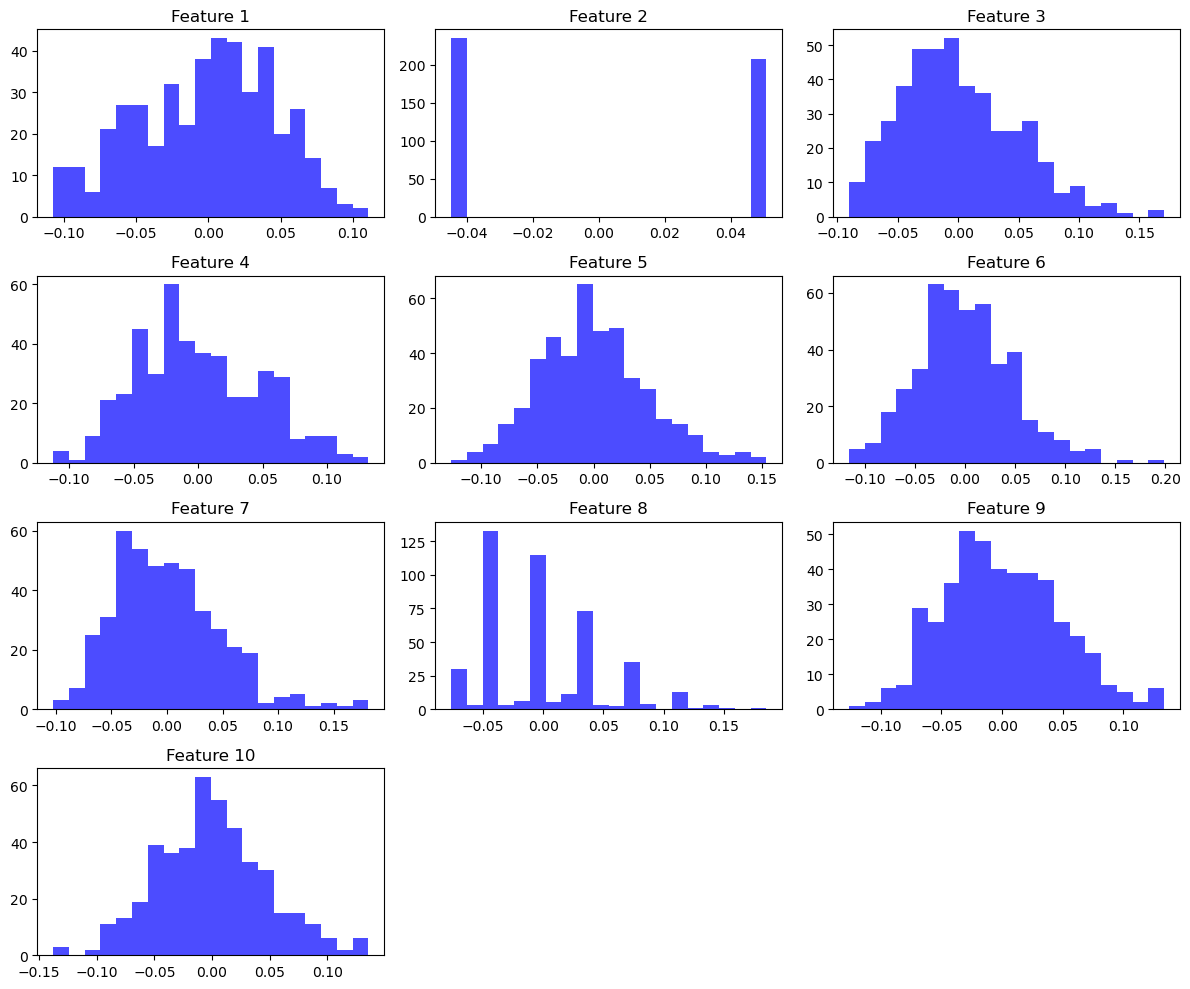

Initial Means: [-1.44429466e-18  2.54321451e-18 -2.25592546e-16 -4.85408596e-17
 -1.42859580e-17  3.89881064e-17 -6.02836031e-18 -1.78809958e-17
  9.24348582e-17  1.35176953e-17]
Initial Standard deviations: [0.04756515 0.04756515 0.04756515 0.04756515 0.04756515 0.04756515
 0.04756515 0.04756515 0.04756515 0.04756515]


In [18]:
#TODO# Load dataset
diabete_data = datasets.load_diabetes()
X2 = diabete_data.data
Y2 = diabete_data.target

print(X.shape, Y.shape)

# [X2,Y2]=##TODO## ???

# Does the data require scaling or normalising before training a neural network model?
import matplotlib.pyplot as plt

# 绘制原始数据的直方图
plt.figure(figsize=(12, 10))
for i in range(X2.shape[1]):
    plt.subplot(4, 3, i + 1)
    plt.hist(X2[:, i], bins=20, color='blue', alpha=0.7)
    plt.title(f"Feature {i+1}")
plt.tight_layout()
plt.show()

initial_means = X2.mean(axis=0)
initial_stds = X2.std(axis=0)
print("Initial Means:", initial_means)
print("Initial Standard deviations:", initial_stds)


# from sklearn.preprocessing import StandardScaler

# # 初始化标准化器
# scaler = StandardScaler()

# # 拟合标准化器并转换数据
# X2_standardized = scaler.fit_transform(X2)

# # 检查转换后的数据，确认均值接近0，标准差接近1
# means = X2_standardized.mean(axis=0)
# stds = X2_standardized.std(axis=0)

# print("Means (should be approx. 0):", means)
# print("Standard deviations (should be 1):", stds)

## Part (b) 
Split the data into training and testing sets

In [19]:
##TODO## Split dataset
Xtr2, Xtest2, Ytr2, Ytest2 =  train_test_split(X2, Y2, test_size = 0.2, random_state = 42)

## MLPRegressor from `sklearn.neural_network`
Class MLPRegressor from `sklearn.neural_network` implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function  in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous

## Part (c)
Import the `MLPRegressor` from `sklearn.neural_network`. After importing, check the default parameters of the `MLPRegressor` model.
- What are the default values for parameters such as `hidden_layer_sizes`, `activation`, and `solver`?
- How would you go about changing any of these default parameters for your model?
## Create the instance of the MLPRegressor
Create an instance of the `MLPRegressor` with the following settings:
- 2 hidden layers, each with 10 neurons.
- Set the maximum number of iterations (`max_iter`) to 10.
  
Train the model using the training data (`Xtr2`,`Ytr2`)

In [20]:
#TODO# Import the MLPRegressor from sklearn.neural_network
from sklearn.neural_network import MLPRegressor

# Create the MLP Regressor model
mlp_regression = MLPRegressor(
    hidden_layer_sizes = (10,10),  
    activation = "relu",   
    learning_rate_init = 0.01,
    max_iter = 10, 
    verbose = 2
)

# #TODO## Train the model
mlp_regression.fit(Xtr2, Ytr2)

Iteration 1, loss = 14770.16465087
Iteration 2, loss = 14747.05270510
Iteration 3, loss = 14724.68126550
Iteration 4, loss = 14702.13264953
Iteration 5, loss = 14678.59409560
Iteration 6, loss = 14653.92844985
Iteration 7, loss = 14627.51633223
Iteration 8, loss = 14600.04790061
Iteration 9, loss = 14570.28671711
Iteration 10, loss = 14539.10751147


/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 10), learning_rate_init=0.01, max_iter=10,
             verbose=2)

## Part (d)
Make predictions on the test set (`Xtest2`).
Evaluate the model using appropriate metrics from sklearn.metrics.

In [21]:
from sklearn.metrics import mean_squared_error, r2_score
#TODO## Predict on the test set
Y_pred_mlp2 = mlp_regression.predict(Xtest2)

##TODO##
#import appropriate functions 

mse = mean_squared_error(Ytest2, Y_pred_mlp2)
r2 = r2_score(Ytest2, Y_pred_mlp2)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 25903.49421660162
R2 Score: -3.889156718445105


## Part (e)
Experiment with Hidden Layer Configurations
This neural network currently has 2 hidden layers, each with 10 neurons (`hidden_layer_sizes=(10,10)`). The parameter `hidden_layer_sizes=(x, y, ...)` specifies the number of neurons in each layer.

- Try experimenting with different configurations of hidden layers (e.g., fewer or more layers, or varying the number of neurons per layer) to observe their effect on the model's performance.
- Does increasing the number of layers or neurons always improve the performance? Why or why not?
- Change the activation function and observe how it impacts the model's performance.
-Investigate the Parameter `learning_rate_init`


## Part (f) (Optional) 
Plot the predicted vs actual values
After training the `MLPRegressor` and predicting the outputs for `Xtest2`, create a scatter plot to compare the predicted values (`Y_pred_mlp2`) against the actual values (`Ytest2`).


In [22]:
##TODO## Optionally, plot the predicted vs actual values

##  Part (g) Optional 
Plot the loss curve (progression of the loss during training)
Access the model's loss curve to visualise the progression of the loss during training.
- Use the `loss_curve_` attribute of the trained model to retrieve the loss values for each iteration.

In [23]:
# Plot the loss curve (progression of the loss during training)
##TODO##

# Extra
Grid Search
Investigate GridSearchCV from sklearn.model_selection for optimising the parameters of neural network. Apply it to both MLP classification and regression tasks using the following grid of parameters

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],  # Number of neurons per layer
    'activation': ['relu', 'logistic'],  # Activation functions
    'learning_rate_init': [0.001, 0.01, 0.1]  # Learning rate
}

mlp = MLPClassifier(max_iter=20, verbose=2)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
grid_search.fit(Xtr1, Ytr1)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

y_pred_mlp1 = grid_search.predict(Xtest1)

from sklearn.metrics import accuracy_score
accuracy_mlp1 = accuracy_score(Ytest1, y_pred_mlp1)
print("Test set accuracy: {:.2f}".format(accuracy_mlp1))


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warning

Iteration 1, loss = 5.42907955
Iteration 2, loss = 1.01221238
Iteration 3, loss = 0.45763735
Iteration 4, loss = 0.24965578
Iteration 5, loss = 0.17268366
Iteration 6, loss = 0.11221388
Iteration 7, loss = 0.06904734
Iteration 8, loss = 0.04814836
Iteration 9, loss = 0.04055865
Iteration 10, loss = 0.03237371
Iteration 11, loss = 0.02672430
Iteration 12, loss = 0.01844463
Iteration 13, loss = 0.01731737
Iteration 14, loss = 0.01728080
Iteration 15, loss = 0.01551052
Iteration 16, loss = 0.01040366
Iteration 17, loss = 0.01335348
Iteration 18, loss = 0.01589377
Iteration 19, loss = 0.00976897
Iteration 20, loss = 0.00714198
Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.01}
Best cross-validation score: 0.97
Test set accuracy: 0.96


/opt/anaconda3/envs/text_analytics/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
